In [1]:
# Importing necessary packages
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from keras.layers import Dropout
from tensorflow.keras.applications import resnet

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
base_dir = r'C:\Users\nipun\PycharmProjects\app\Team15_EndSemProject\Datasets'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

# Directory with our training negative breast cancer pictures
train_0_dir = os.path.join(train_dir, '0')

# Directory with our training positive  breast cancer pictures
train_1_dir = os.path.join(train_dir, '1')

# Directory with our test negative  breast cancer pictures
test_0_dir = os.path.join(test_dir, '0')

# Directory with our test positive  breast cancer pictures
test_1_dir = os.path.join(test_dir, '1')

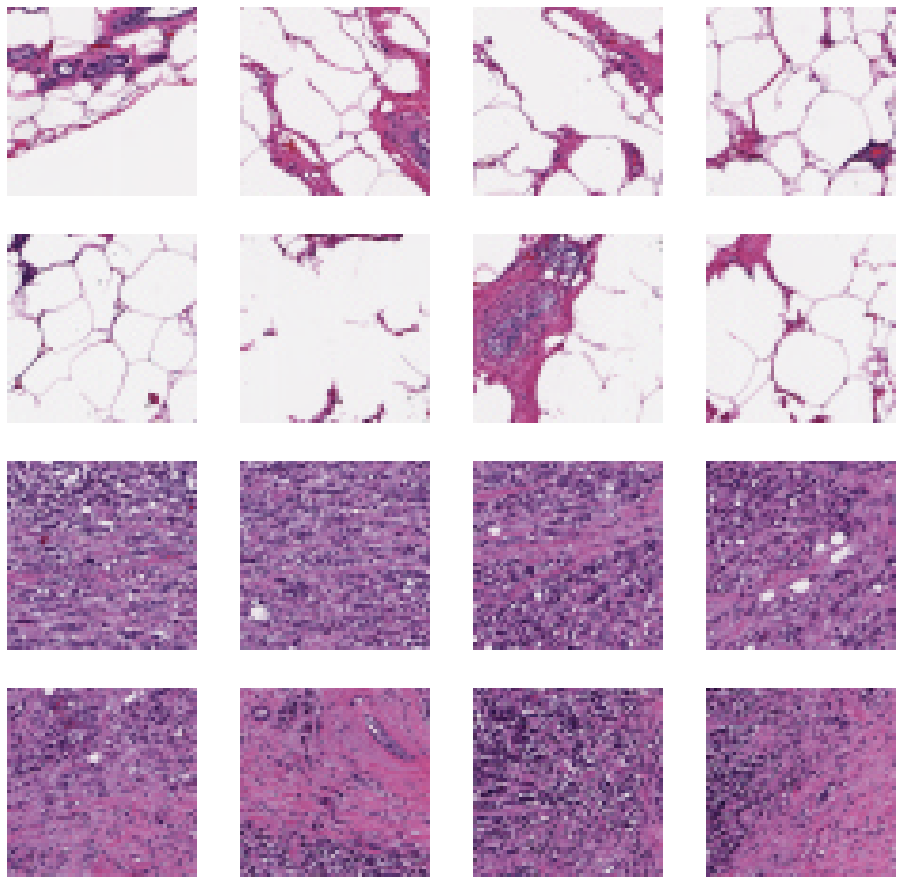

In [3]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_0_fnames = os.listdir( train_0_dir )
train_1_fnames = os.listdir( train_1_dir )


next_0_pix = [os.path.join(train_0_dir, fname) 
                for fname in train_0_fnames[ pic_index-8:pic_index] 
               ]

next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_0_pix+next_1_pix):
  # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)
        img = mpimg.imread(img_path)
        plt.imshow(img)

plt.show()

In [4]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [5]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 3538 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
# using VGG16 model to classify images
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01), loss = 'binary_crossentropy',metrics = ['acc'])

In [9]:
vgghist = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 5, epochs = 100)

Epoch 1/100
5/5 [==============================] - 35s 8s/step - loss: 140.7170 - acc: 0.4800 - val_loss: 81.5668 - val_acc: 0.7200
Epoch 2/100
5/5 [==============================] - 34s 8s/step - loss: 36.4300 - acc: 0.7000 - val_loss: 3.5816 - val_acc: 0.7280
Epoch 3/100
5/5 [==============================] - 36s 8s/step - loss: 18.4316 - acc: 0.7400 - val_loss: 14.0784 - val_acc: 0.3280
Epoch 4/100
5/5 [==============================] - 37s 9s/step - loss: 18.1729 - acc: 0.6800 - val_loss: 9.3879 - val_acc: 0.7200
Epoch 5/100
5/5 [==============================] - 36s 8s/step - loss: 22.1957 - acc: 0.5900 - val_loss: 1.4430 - val_acc: 0.8200
Epoch 6/100
5/5 [==============================] - 36s 8s/step - loss: 8.1755 - acc: 0.7000 - val_loss: 6.8650 - val_acc: 0.7200
Epoch 7/100
5/5 [==============================] - 36s 8s/step - loss: 9.0676 - acc: 0.6100 - val_loss: 0.6881 - val_acc: 0.8680
Epoch 8/100
5/5 [==============================] - 36s 8s/step - loss: 2.4129 - acc: 0.79

Epoch 64/100
5/5 [==============================] - 39s 9s/step - loss: 0.6894 - acc: 0.6100 - val_loss: 0.4752 - val_acc: 0.8080
Epoch 65/100
5/5 [==============================] - 39s 9s/step - loss: 0.5514 - acc: 0.7700 - val_loss: 0.5083 - val_acc: 0.7160
Epoch 66/100
5/5 [==============================] - 39s 9s/step - loss: 0.7440 - acc: 0.7100 - val_loss: 0.8390 - val_acc: 0.7200
Epoch 67/100
5/5 [==============================] - 38s 9s/step - loss: 0.5013 - acc: 0.7700 - val_loss: 0.5043 - val_acc: 0.7280
Epoch 68/100
5/5 [==============================] - 38s 9s/step - loss: 0.3593 - acc: 0.8000 - val_loss: 0.5812 - val_acc: 0.7200
Epoch 69/100
5/5 [==============================] - 39s 9s/step - loss: 0.6422 - acc: 0.6700 - val_loss: 0.5202 - val_acc: 0.7200
Epoch 70/100
5/5 [==============================] - 39s 9s/step - loss: 0.4329 - acc: 0.6800 - val_loss: 0.4981 - val_acc: 0.7680
Epoch 71/100
5/5 [==============================] - 39s 9s/step - loss: 0.4585 - acc: 0.79

In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# using InceptionV3 model to classify images
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['acc'])

In [13]:
inc_history = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 5, epochs = 100)


Epoch 1/100
5/5 [==============================] - 19s 3s/step - loss: 2334.3743 - acc: 0.5714 - val_loss: 867.4589 - val_acc: 0.7200
Epoch 2/100
5/5 [==============================] - 12s 3s/step - loss: 656.2283 - acc: 0.6500 - val_loss: 470.3156 - val_acc: 0.2800
Epoch 3/100
5/5 [==============================] - 13s 3s/step - loss: 437.9691 - acc: 0.5300 - val_loss: 19.8299 - val_acc: 0.7840
Epoch 4/100
5/5 [==============================] - 12s 3s/step - loss: 85.4834 - acc: 0.6500 - val_loss: 300.6636 - val_acc: 0.7200
Epoch 5/100
5/5 [==============================] - 14s 3s/step - loss: 154.4584 - acc: 0.6100 - val_loss: 108.3605 - val_acc: 0.7200
Epoch 6/100
5/5 [==============================] - 12s 3s/step - loss: 111.4426 - acc: 0.6100 - val_loss: 144.4518 - val_acc: 0.7200
Epoch 7/100
5/5 [==============================] - 12s 3s/step - loss: 58.3764 - acc: 0.7700 - val_loss: 42.2316 - val_acc: 0.7320
Epoch 8/100
5/5 [==============================] - 12s 3s/step - loss: 1

Epoch 64/100
5/5 [==============================] - 13s 3s/step - loss: 0.5968 - acc: 0.6800 - val_loss: 0.6302 - val_acc: 0.7240
Epoch 65/100
5/5 [==============================] - 13s 3s/step - loss: 0.8825 - acc: 0.6200 - val_loss: 0.9128 - val_acc: 0.7240
Epoch 66/100
5/5 [==============================] - 12s 3s/step - loss: 0.7826 - acc: 0.6400 - val_loss: 0.5859 - val_acc: 0.7240
Epoch 67/100
5/5 [==============================] - 12s 3s/step - loss: 0.6645 - acc: 0.5300 - val_loss: 0.5688 - val_acc: 0.7240
Epoch 68/100
5/5 [==============================] - 12s 3s/step - loss: 0.5534 - acc: 0.7800 - val_loss: 0.5639 - val_acc: 0.7240
Epoch 69/100
5/5 [==============================] - 12s 3s/step - loss: 1.3162 - acc: 0.7000 - val_loss: 0.7259 - val_acc: 0.7240
Epoch 70/100
5/5 [==============================] - 12s 3s/step - loss: 5.7346 - acc: 0.6900 - val_loss: 0.5800 - val_acc: 0.7640
Epoch 71/100
5/5 [==============================] - 12s 3s/step - loss: 0.4871 - acc: 0.70

In [14]:
from tensorflow.keras.applications import ResNet50
# using ResNet50 to classify images in the model
base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [15]:
for layer in base_model.layers:
    layer.trainable = False

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization,  Flatten, GlobalAveragePooling2D
from keras.callbacks import TensorBoard
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [17]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['acc'])

In [19]:
resnet_history = base_model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 5, epochs = 20)

Epoch 1/20
5/5 [==============================] - 43s 9s/step - loss: 0.3258 - acc: 0.9200 - val_loss: 1.1966 - val_acc: 0.4520
Epoch 2/20
5/5 [==============================] - 40s 9s/step - loss: 0.2329 - acc: 0.9400 - val_loss: 1.4045 - val_acc: 0.4400
Epoch 3/20
5/5 [==============================] - 41s 9s/step - loss: 0.3799 - acc: 0.9300 - val_loss: 0.8755 - val_acc: 0.6840
Epoch 4/20
5/5 [==============================] - 42s 9s/step - loss: 0.5501 - acc: 0.8700 - val_loss: 1.2831 - val_acc: 0.7040
Epoch 5/20
5/5 [==============================] - 41s 9s/step - loss: 0.4906 - acc: 0.8700 - val_loss: 1.5995 - val_acc: 0.7200
Epoch 6/20
5/5 [==============================] - 41s 9s/step - loss: 0.5245 - acc: 0.8900 - val_loss: 0.9422 - val_acc: 0.6480
Epoch 7/20
5/5 [==============================] - 44s 10s/step - loss: 0.5425 - acc: 0.9000 - val_loss: 1.6341 - val_acc: 0.7160
Epoch 8/20
5/5 [==============================] - 42s 9s/step - loss: 0.5312 - acc: 0.9100 - val_loss: 